In [1]:
# The API of tensorflow has been significantly changed in 2.0.
# In this case, we used 2.1.0.
# Please use the following command when you want to re-install tensorflow.
# =====================================================
# pip uninstall tensorflow -y
# pip install tensorflow==2.1.0

In [2]:
import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
print('TensorFlow : ', tf.__version__)

TensorFlow :  2.1.0


In [4]:
np.random.seed(20200427)
tf.random.set_seed(20200427)

In [5]:
# Generates data with a correct label value of t=0
n0, mu0, variance0 = 40, [10, 11], 40
data0 = multivariate_normal(mu0, np.eye(2)*variance0, n0)
df0 = DataFrame(data0, columns=['x1', 'x2'])
df0['t'] = 0

# Generates data with a correct label value of t=1
n1, mu1, variance1 = 30, [18, 20], 44
data1 = multivariate_normal(mu1, np.eye(2)*variance1, n1)
df1 = DataFrame(data1, columns=['x1', 'x2'])
df1['t'] = 1

# Stored in the Pandas data frame
df = pd.concat([df0, df1], ignore_index=True)

In [6]:
# Create training data
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)
# Confirmation
train_set

,x1,x2,t
0,29.195801,4.480375,1
1,18.233707,10.490015,0
2,9.548994,10.179677,0
3,13.029101,14.030732,1
4,13.533072,25.942515,1
...,...,...,...
65,12.230591,15.211952,1
66,24.942118,21.560676,1
67,9.493323,16.527605,0
68,22.561556,23.866368,1


In [7]:
# Storing the input data
train_x = train_set[['x1', 'x2']].values
# Confirmation
train_x

array([[29.19580119,  4.48037497],
       [18.23370719, 10.49001493],
       [ 9.54899375, 10.17967682],
       [13.02910098, 14.03073202],
       [13.5330719 , 25.94251532],
       [27.803148  , 20.35728851],
       [14.92129272, 20.97113781],
       [ 9.40104129, 17.05631617],
       [16.61651357,  6.93419389],
       [21.61522736, 11.61192808],
       [20.81316203, 13.5606034 ],
       [13.18822779,  6.89553375],
       [-0.71310736, 11.44290884],
       [26.7588597 , 19.17758819],
       [ 6.63458963, 15.30308361],
       [17.35407957, 10.67926532],
       [ 7.16466741, 24.34108057],
       [17.34890636,  7.12693608],
       [13.38240091, 20.34501635],
       [ 8.7986429 , 17.95743244],
       [17.57940096, 15.33456766],
       [ 5.90914379, -0.48018636],
       [26.13429021, 26.12797726],
       [15.30450781, 18.39781032],
       [19.2701948 , 16.5551176 ],
       [ 7.8296035 , 13.73724851],
       [ 3.43682788, -5.58133382],
       [ 9.61663979, 14.60875134],
       [22.21157017,

In [8]:
# Storing the correct answer label
train_t = train_set['t'].values
# Confirmation
train_t

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1])

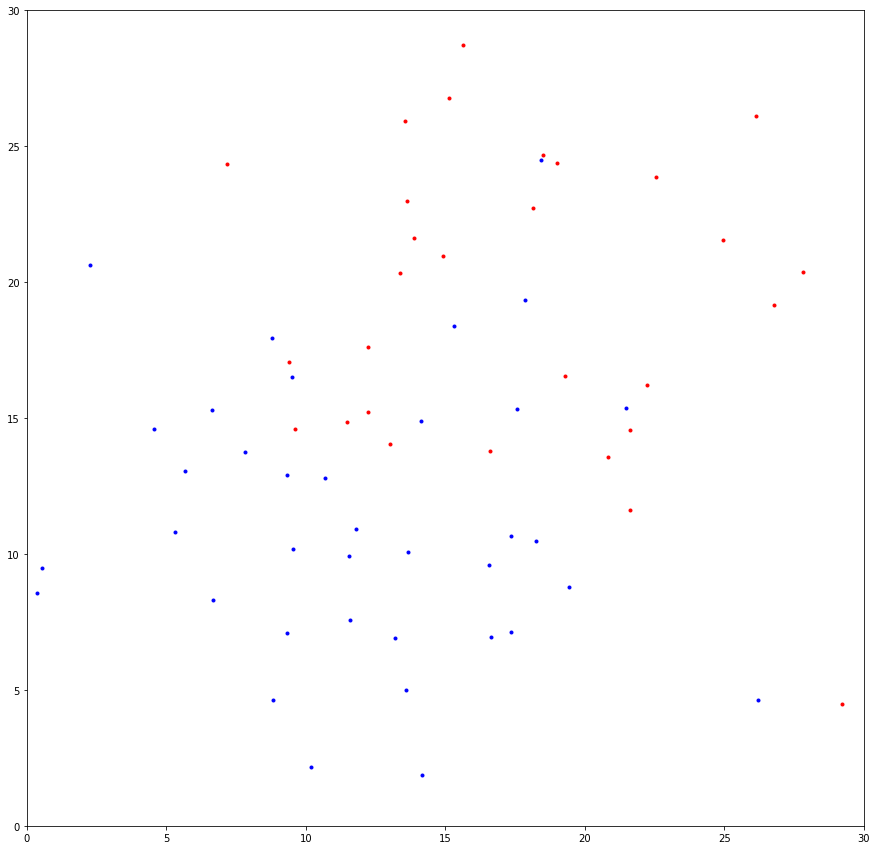

In [9]:
train_set0 = train_set[train_set['t']==0]
train_set1 = train_set[train_set['t']==1]

fig = plt.figure(figsize=(15, 15))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([0, 30])
subplot.set_xlim([0, 30])

# Drawing training data
subplot.scatter(train_set1.x1, train_set1.x2, marker='.', color='red')
subplot.scatter(train_set0.x1, train_set0.x2, marker='.', color='blue')

In [10]:
# A model to calculate the probability that the label is t=1
model = models.Sequential()
# Create a node of first-order function + sigmoid function
model.add(layers.Dense(1, 
                                           activation='sigmoid', 
                                           input_shape=(2,), 
                                           name='logistic_regression'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
logistic_regression (Dense)  (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [11]:
# The error function is Binary Cross Entropy
model.compile(optimizer='adam',
                         loss='binary_crossentropy',
                         metrics=['acc'])

In [12]:
# 10 repetitions of learning
history = model.fit(train_x, train_t, batch_size=len(train_x), epochs=10)

Train on 70 samples
Epoch 1/10
70/70 [==============================] - 0s 3ms/sample - loss: 12.1863 - acc: 0.4286
Epoch 2/10
70/70 [==============================] - 0s 39us/sample - loss: 12.1733 - acc: 0.4286
Epoch 3/10
70/70 [==============================] - 0s 26us/sample - loss: 12.1602 - acc: 0.4286
Epoch 4/10
70/70 [==============================] - 0s 24us/sample - loss: 12.1472 - acc: 0.4286
Epoch 5/10
70/70 [==============================] - 0s 24us/sample - loss: 12.1341 - acc: 0.4286
Epoch 6/10
70/70 [==============================] - 0s 24us/sample - loss: 12.1211 - acc: 0.4286
Epoch 7/10
70/70 [==============================] - 0s 29us/sample - loss: 12.1080 - acc: 0.4286
Epoch 8/10
70/70 [==============================] - 0s 23us/sample - loss: 12.0950 - acc: 0.4286
Epoch 9/10
70/70 [==============================] - 0s 24us/sample - loss: 12.0819 - acc: 0.4286
Epoch 10/10
70/70 [==============================] - 0s 32us/sample - loss: 12.0689 - acc: 0.4286


In [13]:
# 5000 repetitions of learning (Not shown on screen)
history = model.fit(train_x, train_t, batch_size=len(train_x), epochs=5000, verbose=0)

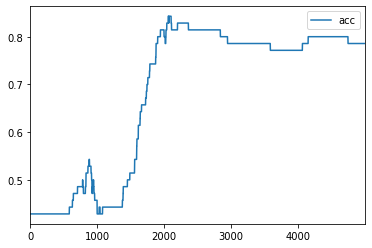

In [14]:
# Change in the percentage of correct answers
DataFrame({'acc': history.history['acc']}).plot()

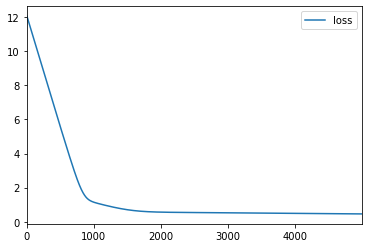

In [15]:
# Change in the　error function
DataFrame({'loss': history.history['loss']}).plot()

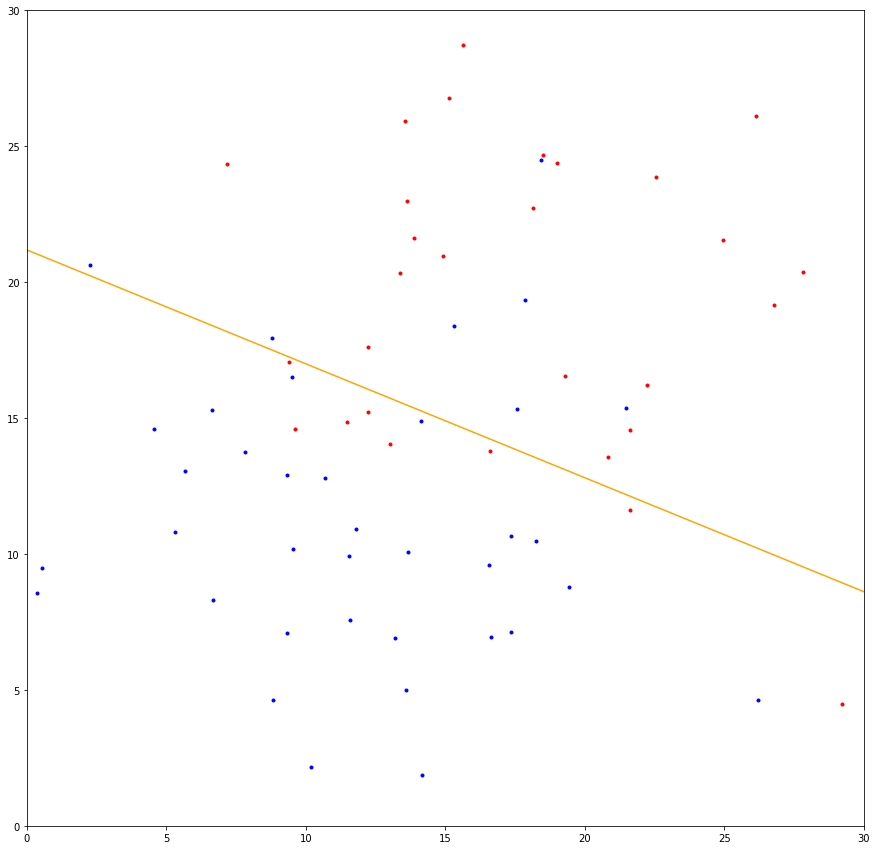

In [16]:
[[w1], [w2]], [b] = model.get_weights()

train_set0 = train_set[train_set['t']==0]
train_set1 = train_set[train_set['t']==1]

fig = plt.figure(figsize=(15, 15))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([0, 30])
subplot.set_xlim([0, 30])

# Drawing training data
subplot.scatter(train_set1.x1, train_set1.x2, marker='.', color='red')
subplot.scatter(train_set0.x1, train_set0.x2, marker='.', color='blue')

xs = np.linspace(0, 30, 10)
ys = - (w1*xs/w2 + b/w2)

# Drawing a border
subplot.plot(xs, ys, color='orange')